In [1]:
import pandas as pd
import numpy as np
import os, sys
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
plt.rc("font",family="Arial")

In [3]:
proj = pd.read_csv('orexin_data_new.csv', index_col=0)
region_mark = pd.read_excel('orexin_plots_new.xlsx', index_col=0)
proj = proj.loc[:, proj.columns.isin(region_mark.index)]
cluster_mark = pd.read_excel('orexin_soma_infor_cluster.xlsx', index_col=0)

In [4]:
data = proj.copy()
data = data.T
data = data/data.sum()
data = data.T

In [5]:
plot = data.unstack().reset_index()
plot.columns = ['region', 'neuron', 'length']
plot['pathway'] = [region_mark.loc[item, 'group'] for item in plot.region]
plot['cluster'] = [cluster_mark.loc[item, 'cluster'] for item in plot.neuron]

In [6]:
show = plot[['pathway', 'neuron', 'length']].groupby(by=['neuron', 'pathway']).sum().reset_index()
show['cluster'] = [cluster_mark.loc[item, 'cluster'] for item in show.neuron]

In [7]:
color_dict = {'Dorsal_ascending':'#17983B','Dorsal_decending':'#433290',
       'Ventral_ascending':'#A11F24', 'Ventral_decending':'#54B9EA', 'hypothalamus':'#F8B62D'}

In [8]:
show['colors'] = [color_dict[item] for item in show.pathway]

In [9]:
show = show.pivot(index='neuron', columns='pathway', values='length')
show['cluster'] = [cluster_mark.loc[item, 'cluster'] for item in show.index]
show = show.sort_values(by='cluster')


In [10]:
line_list = []
for cluster in show.cluster.unique():
    dftmp = show.loc[show.cluster <= cluster]
    line_list.append(len(dftmp))


In [11]:
show = show.drop(columns='cluster')

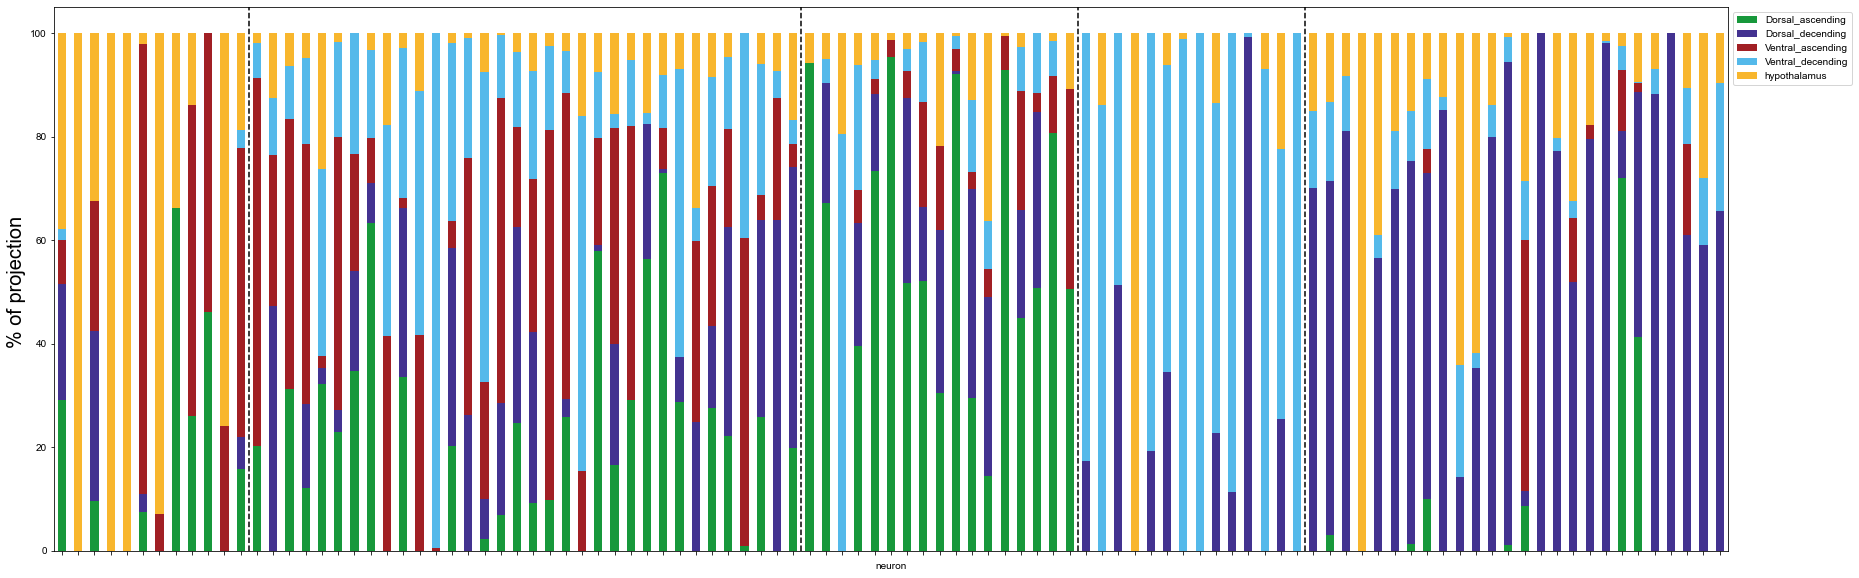

In [12]:

ax = (show*100).plot.bar(color=color_dict, stacked=True, figsize=(30,10))
for line_item in line_list[0:-1]:
    plt.axvline(x=line_item-0.5, color='k', linestyle='--')
ax.set_xticklabels([])
ax.set_ylabel("% of projection ",fontsize=20)
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.savefig('orexin_pathway.pdf', dpi=600)